# Notas de aula: Mecânica Quântica, Autor: Jonas Maziero, Departamento de Física, UFSM

Link para o vídeo da aula sobre esse tópico: .

In [1]:
%run init.ipynb

# Barreira de potencial
Para a barreira de potencial, podemos escrever a função energia potencial como:
\begin{cases}
U(x<0)=0, \\
U(0<x<a)=U_{0}=\text{constante}, \\
U(x>a)=0.
\end{cases}
As soluções da equação de Schrödinher, que, para as três regiões, pode ser escrita na forma 
\begin{equation}
\partial_{xx}\Xi(x)+k^{2}\Xi(x)=0,
\end{equation}
são obtidas como no caso do dregrau de potencial. 

## $E<U_{0}$
Nesse caso as soluções da EqSIT1D podem ser escritas na forma
\begin{align}
& \Xi_{e}(x<0) = c_{ed}e^{ik_{e}x} + c_{ee}e^{-ik_{e}x}, \\
& \Xi_{b}(0<x<a) = c_{bd}e^{-k_{b}x} + c_{bc}e^{k_{b}x}, \\
& \Xi_{d}(x>a) = c_{dd}e^{ik_{e}x} + c_{de}e^{-ik_{e}x},
\end{align}
com
\begin{equation}
k_{e}=\frac{\sqrt{2mE}}{\hbar} \text{ e } k_{b}=\frac{\sqrt{2m(U_{0}-E)}}{\hbar}.
\end{equation}
OBS. Aqui não usarei o til para diferenciar os dois casos.

Novamente, $c_{ed}$ determina o fluxo de quantons incidindo na barreira de potencial e consideramos que os quantons movem-se inicialmente na região $x<0$ da esquerda para a direita. Pontanto, se o quanton passou para a região $x>a$ não há motivo para este retornar, então
\begin{equation}
c_{de} := 0.
\end{equation}

As outras constantes, $c_{ee},c_{bd},c_{ba},c_{dd}$, são determinadas, em termos de $c_{ed}$, impondo a continuidade da função de onda e de sua primeira derivada. Usando
\begin{align}
& \partial_{x}\Xi_{e} = ik_{e}\left(c_{ed}e^{ik_{e}x}-c_{ee}e^{-ik_{e}x}\right), \\
& \partial_{x}\Xi_{b} = -k_{b}\left(c_{bd}e^{-k_{b}x}-c_{bc}e^{k_{b}x}\right), \\
& \partial_{x}\Xi_{d} = ik_{e}c_{dd}e^{ik_{e}x},
\end{align}
teremos
\begin{align}
\Xi_{e}(x=0) = \Xi_{b}(x=0) & \\
& \therefore c_{ed}+c_{ee}=c_{bd}+c_{bc} \therefore -c_{ee}+c_{bd}+c_{bc}+0c_{dd}=c_{ed}, \\
\Xi_{b}(x=a) = \Xi_{d}(x=a) & \\ 
& \therefore c_{bd}e^{-k_{b}a}+c_{bc}e^{k_{b}a}=c_{dd}e^{ik_{e}a} \therefore 0c_{ee}+e^{-k_{b}a}c_{bd}+e^{k_{b}a}c_{bc}-e^{ik_{e}a}c_{dd}=0, \\
\partial_{x}\Xi_{e}(x=0)=\partial_{x}\Xi_{b}(x=0) & \\ 
& \therefore ik_{e}(c_{ed}-c_{ee})=-k_{b}(c_{bd}-c_{bc}) \therefore ik_{e}c_{ee}-k_{b}c_{bd}+k_{b}c_{bc}+0c_{dd}=ik_{e}c_{ed}, \\
\partial_{x}\Xi_{e}(x=a)=\partial_{x}\Xi_{b}(x=a) & \\ 
& \therefore -k_{b}\left(c_{bd}e^{-k_{b}a}-c_{bc}e^{k_{b}a}\right) = ik_{e}c_{dd}e^{ik_{e}a} \therefore 0c_{ee}-k_{b}e^{-k_{b}a}c_{bd}+k_{b}e^{k_{b}a}c_{bc}-ik_{e}e^{ik_{e}a}c_{dd}=0.
\end{align}
Ou, na forma matricial,
\begin{equation}
\begin{bmatrix} -1&1&1&0 \\ 0&e^{-k_{b}a}&e^{k_{b}a}&-e^{ik_{e}a} \\ ik_{e}&-k_{b}&k_{b}&0 \\ 0&-k_{b}e^{-k_{b}a}&k_{b}e^{k_{b}a}&-ik_{e}e^{ik_{e}a} \end{bmatrix}\begin{bmatrix} c_{ee}\\c_{bd}\\c_{bc}\\c_{dd}\end{bmatrix}=\begin{bmatrix} c_{ed} \\ 0 \\ ik_{e}c_{ed} \\ 0\end{bmatrix}\text{ ou } A|x\rangle=|y\rangle.
\end{equation}
Se $\det(A)\ne 0$, a inversa de $A$ existe e a solução do sistema de equações lineares é $|x\rangle=A^{-1}|y\rangle$, com $(A^{-1})_{j,k}=(-1)^{k+j}\det(A^{(k,j)})/\det(A)$ (veja https://github.com/jonasmaziero/algebra_linear/blob/master/01_determinant.ipynb). No entanto, essas contas são muito longas para os propósitos dessa disciplina, e por isso usaremos os resultados obtidos com o Sympy, como mostrado abaixo.

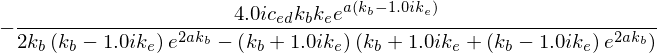

In [65]:
a, ke, kb, ced, cee, cbd, cbc, cdd = symbols('a k_{e} k_{b} c_{ed} c_{ee} c_{bd} c_{bc} c_{dd}')
A = Matrix([[-1,1,1,0],[0,exp(-kb*a),exp(kb*a),-exp(1j*ke*a)],[1j*ke,-kb,kb,0],
            [0,-kb*exp(-kb*a),kb*exp(kb*a),-1j*ke*exp(1j*ke*a)]])#; A
Am1 = A.inv()
simplify(Am1[3,0]*ced + 0 + Am1[3,2]*1j*ke*ced) + 0

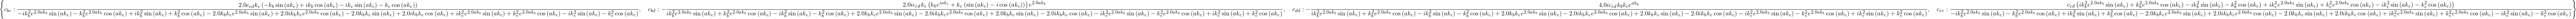

In [45]:
solve([ced+cee-cbd-cbc, cbd*exp(-kb*a)+cbc*exp(kb*a)-cdd*(cos(ke*a)+1j*sin(ke*a)),
       1j*ke*(ced-cee)+kb*(cbd-cbc), -kb*(cbd*exp(-kb*a)-cbc*exp(kb*a))-1j*ke*cdd*(cos(ke*a)+1j*sin(ke*a))],
      cee,cbd,cbc,cdd)

No caso da barreira de potencial, iniciaremos calculando o coeficiente de transmissão, 
\begin{equation}
T:=\frac{|c_{dd}|^{2}}{|c_{ed}|^{2}},
\end{equation}
uma vez que a velocidade é a mesma, $\omega/k_{e}$, nas regiões $x<0$ e $x>a$. Dos cálculos com o Sympy, teremos que
\begin{align}
\frac{-c_{dd}}{ic_{ed}} & = \frac{4k_{e}k_{b}e^{k_{b}a}e^{-ik_{e}a}}{2k_{b}(k_{b}-ik_{e})e^{2k_{b}a}-(k_{b}+ik_{e})(k_{b}+ik_{e}+(k_{b}-ik_{e})e^{2k_{b}a})} \\
& = \frac{4k_{e}k_{b}e^{k_{b}a}e^{-ik_{e}a}} {2(k_{b}^{2}-ik_{b}k_{e})e^{2k_{b}a}-k_{b}^{2}-2ik_{b}k_{e}+k_{e}^{2}-(k_{b}^{2}+k_{e}^{2})e^{2k_{b}a}} \\
& = \frac{4k_{e}k_{b}e^{k_{b}a}e^{-ik_{e}a}} {(2k_{b}^{2}-k_{b}^{2}-k_{e}^{2})e^{2k_{b}a}-k_{b}^{2}+k_{e}^{2}-2ik_{b}k_{e}(e^{2k_{b}a}+1)}\frac{e^{-k_{b}a}}{e^{-k_{b}a}} \\
& = \frac{4k_{e}k_{b}e^{-ik_{e}a}} {(k_{b}^{2}-k_{e}^{2})e^{k_{b}a}-(k_{b}^{2}-k_{e}^{2})e^{-k_{b}a}-2ik_{b}k_{e}(e^{k_{b}a}+e^{-k_{b}a})}\frac{1/4k_{b}k_{e}}{1/4k_{b}k_{e}} \\
& = \frac{e^{-ik_{e}a}} {\frac{k_{b}^{2}-k_{e}^{2}}{2k_{b}k_{e}}\frac{e^{k_{b}a}-e^{-k_{b}a}}{2}-i\frac{e^{k_{b}a}+e^{-k_{b}a}}{2}} \\
& = \frac{e^{-ik_{e}a}} {\frac{k_{b}^{2}-k_{e}^{2}}{2k_{b}k_{e}}\sinh(k_{b}a)-i\cosh(k_{b}a)}.
\end{align}

Com isso vem que
\begin{align}
T & = \frac{1} {\frac{(k_{b}^{2}-k_{e}^{2})^{2}}{4k_{b}^{2}k_{e}^{2}}\sinh^{2}(k_{b}a)+\cosh^{2}(k_{b}a)} = \frac{4k_{b}^{2}k_{e}^{2}} {(k_{b}^{4}+k_{e}^{4}-2k_{b}^{2}k_{e}^{2})\sinh^{2}(k_{b}a)+4k_{b}^{2}k_{e}^{2}\cosh^{2}(k_{b}a)} \\
& = \frac{4k_{b}^{2}k_{e}^{2}} {(k_{b}^{4}+k_{e}^{4}+2k_{b}^{2}k_{e}^{2})\sinh^{2}(k_{b}a)+4k_{b}^{2}k_{e}^{2}(\cosh^{2}(k_{b}a)-\sinh^{2}(k_{b}a))} \\
& = \frac{1} {\frac{(k_{b}^{2}+k_{e}^{2})^{2}}{4k_{b}^{2}k_{e}^{2}}\sinh^{2}(k_{b}a)+1}.
\end{align}
Como 
\begin{align}
& \frac{(k_{b}^{2}+k_{e}^{2})^{2}}{k_{b}^{2}k_{e}^{2}} = \frac{(2m(U_{0}-E)+2mE)^{2}}{2m(U_{0}-E)2mE} = \frac{U_{0}^{2}}{E(U_{0}-E)} = \frac{1}{\frac{E}{U_{0}}\left(1-\frac{E}{U_{0}}\right)} \\
& \text{e} \\
& \frac{k_{d}}{k_{e}} = \frac{\sqrt{2m(U_{0}-E)}}{\sqrt{2mE}} = \sqrt{\frac{U_{0}}{E}-1}
\end{align}
obteremos, finalmente, que
\begin{equation}
T = \left(\frac{\sinh^{2}\left(k_{e}a\sqrt{\frac{U_{0}}{E}-1}\right)}{4\frac{E}{U_{0}}\left(1-\frac{E}{U_{0}}\right)}+1\right)^{-1}.
\end{equation}

## $E>U_{0}$
Nesse caso,
\begin{align}
& \Xi_{e}(x<0) = c_{ed}e^{ik_{e}x} + c_{ee}e^{-ik_{e}x}\text{, } \Xi_{b}(0<x<a) = c_{bd}e^{-ik_{b}x} + c_{bc}e^{ik_{b}x}\text{, } \Xi_{d}(x>a) = c_{dd}e^{ik_{e}x} + c_{de}e^{-ik_{e}x}, \\
& \partial_{x}\Xi_{e} = ik_{e}(c_{ed}e^{ik_{e}x} - c_{ee}e^{-ik_{e}x})\text{, } \partial_{x}\Xi_{b} = -ik_{b}(c_{bd}e^{-ik_{b}x} - c_{bc}e^{ik_{b}x})\text{, } \partial_{x}\Xi_{d} = ik_{e}c_{dd}e^{ik_{e}x},
\end{align}
com
\begin{equation}
k_{e}=\frac{\sqrt{2mE}}{\hbar} \text{ e } k_{b}=\frac{\sqrt{2m(E-U_{0})}}{\hbar}
\end{equation}
e, novamente, o quanton move-se inicialmente da esquerda para a direita, e por conseguinte $c_{de}=0$. Ademais
\begin{equation}
\begin{bmatrix} -1&1&1&0 \\ 0&e^{-k_{b}a}&e^{k_{b}a}&-e^{ik_{e}a} \\ ik_{e}&-k_{b}&k_{b}&0 \\ 0&-k_{b}e^{-k_{b}a}&k_{b}e^{k_{b}a}&-ik_{e}e^{ik_{e}a} \end{bmatrix}\begin{bmatrix} c_{ee}\\c_{bd}\\c_{bc}\\c_{dd}\end{bmatrix}=\begin{bmatrix} c_{ed} \\ 0 \\ ik_{e}c_{ed} \\ 0\end{bmatrix}.
\end{equation}

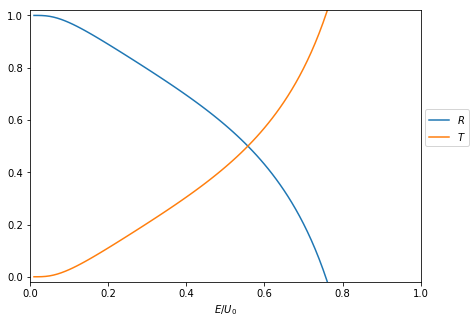

In [83]:
fig = plt.figure(figsize=(7,5)); ke = 1; a = 1; x = np.arange(0.01,0.99,0.01)
T = 1/(1+(np.sinh(ke*a*np.sqrt((1/x)-1)))**2)/(4*x*(1-x)); R = 1-T
plt.plot(x,R); plt.plot(x,T); plt.xlim(0,1); plt.ylim(-0.02,1.02)
plt.xlabel(r'$E/U_{0}$'); plt.legend((r'$R$',r'$T$'),loc=(1.01,0.5))
plt.show()

# Exercícios (para entregar)

1. Dadas as definições $\sinh(x):=(e^{x}-e^{-x})/2$ e $\cosh(x):=(e^{x}+e^{-x})/2$, verifique que $\cosh^{2}(x)-\sinh^{2}(x)=1$.

1. dddd